#### Import of libraries and uploading dataset from csv file

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
raw_data = pd.read_csv("/home/student/Pulpit/nypd.csv", low_memory=False)

#### Cases of accidents are written in five columns "Contributing factor vehicle...". Rows with "UNSAFE SPEED" will be gathered and merged into one DataFrame. To make sure that all entries with "Unsafe speed" (or "UNSAFE SPEED" or any other combination) are included, uppercase will be used for these columns. 

In [57]:
for i in range (1,6):
        column_name = "CONTRIBUTING FACTOR VEHICLE "+str(i)
        raw_data[column_name+" "+"UPPERCASE"]=raw_data[column_name].str.upper()

In [66]:
factors=[0,0,0,0,0]
for i in range (0,5):
    factors[i]=raw_data.loc[(raw_data["CONTRIBUTING FACTOR VEHICLE "+str(i+1)+" UPPERCASE"] == "UNSAFE SPEED")]

In [67]:
unsafe_speed_accidents = pd.concat([factors[0],
                                    factors[1],
                                    factors[2],
                                    factors[3],
                                    factors[4]],ignore_index=True)

#### Number of all people injured or killed in accidents will be summed.

In [68]:
col_list = ["NUMBER OF PERSONS KILLED","NUMBER OF PEDESTRIANS KILLED","NUMBER OF CYCLIST KILLED","NUMBER OF MOTORIST KILLED"]
unsafe_speed_accidents["TOTAL KILLED"]=unsafe_speed_accidents[col_list].sum(axis=1)
col_list2 = ["NUMBER OF PERSONS INJURED","NUMBER OF PEDESTRIANS INJURED","NUMBER OF CYCLIST INJURED","NUMBER OF MOTORIST INJURED"]
unsafe_speed_accidents["TOTAL INJURED"]=unsafe_speed_accidents[col_list2].sum(axis=1)

#### There is significant amount of accidents, that was not asigned to any specified borough. In the future, it will be nessesary, to verify the location data (lattitude.longitude) and fill the NaNs in Borough column.

In [69]:
unsafe_speed_accidents['BOROUGH_FILLED']=unsafe_speed_accidents['BOROUGH'].fillna(value="UNSPECIFIED")

#### For further calculations and for plot only 3 columns are needed - borough, amount of total killed and total injured. These 3 columns will be copied into new DataFrames (separate for each borough) and next, all entries about people injured/killed will be summed. Finally, all 6 DataFrames will be merged into one.

In [70]:
columns_list=['BOROUGH_FILLED',"TOTAL INJURED","TOTAL KILLED"]
unsafe_speed_accidents=unsafe_speed_accidents.filter(items=columns_list)

In [71]:
boroughs = ["BROOKLYN","BRONX","MANHATTAN","QUEENS","STATEN ISLAND","UNSPECIFIED"]
borough_data = {"BROOKLYN" : 0,"BRONX": 0,"MANHATTAN": 0,"QUEENS": 0,"STATEN ISLAND": 0,"UNSPECIFIED": 0}
for i in range (0,6):
    borough_name = boroughs[i]
    borough_data[borough_name] = unsafe_speed_accidents[unsafe_speed_accidents['BOROUGH_FILLED']==borough_name]
    borough_data[borough_name]=pd.DataFrame({'BOROUGH' : borough_name,
                                             'TOTAL INJURED': borough_data[borough_name]['TOTAL INJURED'].sum(),
                                             'TOTAL KILLED': borough_data[borough_name]['TOTAL KILLED'].sum()},index=[1])

In [72]:
data_about_accidents_merged=pd.concat([borough_data['BROOKLYN'],
                                       borough_data['MANHATTAN'],
                                       borough_data['BRONX'],
                                       borough_data['QUEENS'],
                                       borough_data['STATEN ISLAND'],
                                       borough_data['UNSPECIFIED']],ignore_index=True)
data_about_accidents_merged

,BOROUGH,TOTAL INJURED,TOTAL KILLED
0,BROOKLYN,3768.0,40.0
1,MANHATTAN,1034.0,6.0
2,BRONX,2230.0,10.0
3,QUEENS,2987.0,56.0
4,STATEN ISLAND,566.0,4.0
5,UNSPECIFIED,10258.0,198.0


#### Preparing data for plot

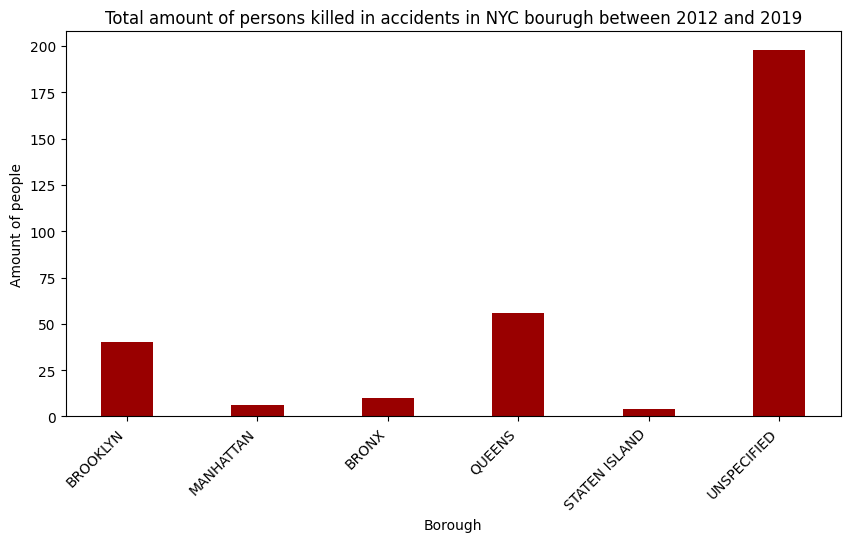

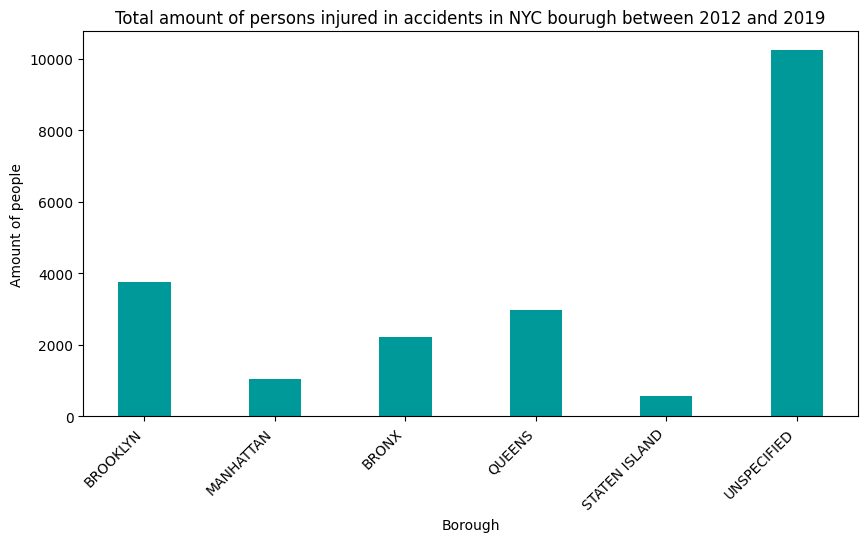

In [73]:
x = data_about_accidents_merged["BOROUGH"]
y = data_about_accidents_merged["TOTAL KILLED"]
fig = plt.figure(figsize = (10, 5))

plt.bar(x, y, color ='#990000', width = 0.4)
 
plt.xlabel("Borough")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Amount of people")
plt.ticklabel_format(style='plain', axis="y")
plt.title("Total amount of persons killed in accidents in NYC bourugh between 2012 and 2019")
plt.show()

x = data_about_accidents_merged["BOROUGH"]
y = data_about_accidents_merged["TOTAL INJURED"]
fig = plt.figure(figsize = (10, 5))

plt.bar(x, y, color ='#009999', width = 0.4)
 
plt.xlabel("Borough")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Amount of people")
plt.ticklabel_format(style='plain', axis="y")
plt.title("Total amount of persons injured in accidents in NYC bourugh between 2012 and 2019")
plt.show()

### Conclusions
#### The highest amount of accidents, in which at least one person suffered, took place in Brooklyn and in Queens. There is great number of accidents not assigned to any borough. In the future, it will be nessesary, to verify the location data (lattitude.longitude) and fill the NaNs in Borough column according to the location.